In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
D = 3
N = 1e8
true_nlist = [1.5, 3, 6, 12, 24]
m = 2/3
nlist = [round(tnn/(1-m)-1, 4) for tnn in true_nlist]

s = 1.0
sc = 1.0
c = s / sc
L = 1.0
num_empty = 200
res_dir = 'nsc-setisaturday-numempty200'
randix = 0

1.0
1.0
1.0
1.0
1.0
0
1
2
3
4


"\nplt.gca().set_xscale('log')\nplt.gca().set_yscale('log')\nplt.gca().set_xlim(1e-5, 30)\nplt.gca().set_ylim(0.1, 1.1)\nplt.gca().set_yticks([0.1, 0.2, 0.5, 1.0])\nplt.gca().set_yticklabels(['0.1', '0.2', '0.5', '1.0'])\nplt.gca().set_xticks([1e-5, 1e-4, 0.001, 0.01, 0.1, 1.0, 10])\nplt.gca().set_xticklabels(['1e-5', '1e-4', '1e-3', '0.01', '0.1', '1.0', '10'])\nfig.savefig('figures-friday/plotCDE-loglog.png', dpi=200)\n"

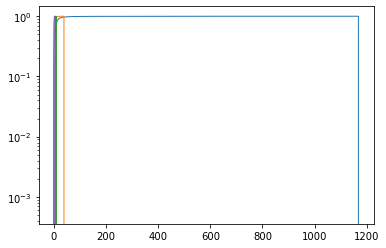

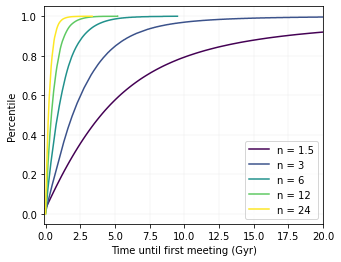

In [14]:
plot_data = []
cmap = plt.get_cmap('viridis')
mycols = cmap(np.linspace(0, 1, len(nlist)))
for nix, n in enumerate(nlist):
    fout = (
        f"{res_dir}/D={D}_n={float(n)}_N={N:.2e}_"
        f"s={s:.1f}_L={L:.1f}_c={c:.5e}_r={randix}"
    )
    res = pd.read_csv(fout+'.csv')
    res_years = pd.read_csv(fout+'_years.csv')
    print((res_years.MinWait>0).mean())
    res_yearsPosMinWait = res_years.MinWait[res_years.MinWait>0]
    (counts, bins, patches) = plt.hist(
        res_yearsPosMinWait, cumulative=True, histtype='step', density=True, log=True, bins=res_yearsPosMinWait.shape[0])
    plot_data.append((bins[0:-1], counts))
fig = plt.figure(figsize=(5,4))
for nix, truen in enumerate(true_nlist):
    print(nix)
    (bins, counts) = plot_data[nix]
    plt.plot(bins, counts, '-', color=mycols[nix])
plt.gca().set_xlim(-0.1, 20)
leg = [f"n = {nn}" for nn in true_nlist]
plt.gca().set_ylabel('Percentile')
plt.gca().set_xlabel('Time until first meeting (Gyr)');
#plt.gca().set_title(f'D={D} N={N:.2e} s/c={s/c:.2f} L={L:.1f}');
plt.legend(leg);
plt.grid(linewidth=0.1);
fig.savefig('figures-friday/plotCDE.png', dpi=200)
"""
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.gca().set_xlim(1e-5, 30)
plt.gca().set_ylim(0.1, 1.1)
plt.gca().set_yticks([0.1, 0.2, 0.5, 1.0])
plt.gca().set_yticklabels(['0.1', '0.2', '0.5', '1.0'])
plt.gca().set_xticks([1e-5, 1e-4, 0.001, 0.01, 0.1, 1.0, 10])
plt.gca().set_xticklabels(['1e-5', '1e-4', '1e-3', '0.01', '0.1', '1.0', '10'])
fig.savefig('figures-friday/plotCDE-loglog.png', dpi=200)
"""

0
1
2
3
4


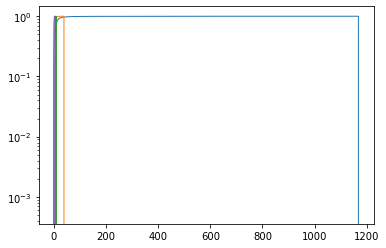

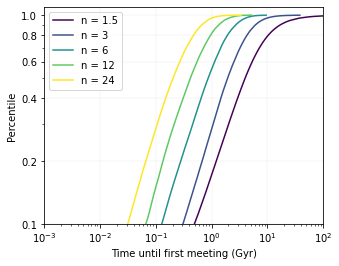

In [13]:
plot_data = []
cmap = plt.get_cmap('viridis')
mycols = cmap(np.linspace(0, 1, len(nlist)))
for nix, n in enumerate(nlist):
    fout = (
        f"{res_dir}/D={D}_n={float(n)}_N={N:.2e}_"
        f"s={s:.1f}_L={L:.1f}_c={c:.5e}_r={randix}"
    )
    res = pd.read_csv(fout+'.csv')
    res_years = pd.read_csv(fout+'_years.csv')
    res_yearsPosMinWait = res_years.MinWait[res_years.MinWait>0]
    (counts, bins, patches) = plt.hist(
        res_yearsPosMinWait, cumulative=True, histtype='step', density=True, log=True, bins=res_yearsPosMinWait.shape[0])
    plot_data.append((bins[0:-1], counts))
fig = plt.figure(figsize=(5,4))
for nix, truen in enumerate(true_nlist):
    print(nix)
    (bins, counts) = plot_data[nix]
    plt.plot(bins, counts, '-', color=mycols[nix])
leg = [f"n = {nn}" for nn in true_nlist]
plt.gca().set_ylabel('Percentile')
plt.gca().set_xlabel('Time until first meeting (Gyr)');
#plt.gca().set_title(f'D={D} N={N:.2e} s/c={s/c:.2f} L={L:.1f}');
plt.legend(leg)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.gca().set_xlim(1e-3, 1e2)
plt.gca().set_ylim(0.1, 1.1)
plt.gca().set_yticks([0.1, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.gca().set_yticklabels([0.1, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.grid(linewidth=0.1)
#plt.gca().set_xticks([1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7])
#plt.gca().set_xticklabels(['10', '100', '1000', '1e4', '1e5', '1e6', '1e7'])
fig.savefig('figures-friday/plotCDE-loglogThousand.png', dpi=200)